# Entrega Nª1: Abriola Juan Jose.

# **Abstract**

En este proyecto se realizará un análisis en base a un conjunto de datos encontrado sobre vehículos. En el dataset se encuentran datos como precio, marca, modelo, kilometros, cantidad de cilindros de un vehículo. El objetivo principal es comprender mejor que es lo que mas influye sobre el precio de un vehículo y en un futuro poder determinar el precio del mismo en base a las caracteristicas.

# **Preguntas e Hipótesis**
A la hora de determinar el precio de un vehículo:

1.   ¿Influye la Marca y la categoría del mismo?
2.   ¿Que tanto influye en el precio el volumen del motor?
3.   Agregados o características que se pueden elegir al momento de comprar un vehículo como, cantidad de airbags que trae, como es su interior, cantidad de cilindros ¿hacen que aumente el precio?
4.   La cantidad de kilometros, color, tipo de combustible ¿Influyen en el precio?


# **Análisis**

In [ ]:
# importar las librerias

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np

In [ ]:
# Ruta al archivo CSV
file_path = 'car_price_prediction.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path)

df_car_price=df

df_car_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
pd.reset_option('display.max_rows')
df_car_price


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
# Dejar ID como index
df_car_price.set_index('ID', inplace=True)
df_car_price.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
# Renombramos las columnas
df_car_price= df.rename(columns={"ID": "ID", "Price":"PRECIO", "Levy":"IMPUESTO", "Manufacturer":"MARCA", "Model":"MODELO", "Prod. year":"AÑO", "Category":"CATEGORIA", "Leather interior":"CUERO_INTERIOR",
                                 "Fuel type":"TIPO_COMBUSTIBLE", "Engine volume":"VOLUMEN_MOTOR", "Mileage":"KILOMETROS", "Cylinders":"CILINDROS", "Gear box type":"TIPO_CAJA_CAMBIOS",
                                 "Drive wheels":"TRACCION", "Doors":"PUERTAS", "Wheel":"VOLANTE", "Color":"COLOR", "Airbags":"AIRBAGS"})
df_car_price.head()

,PRECIO,IMPUESTO,MARCA,MODELO,AÑO,CATEGORIA,CUERO_INTERIOR,TIPO_COMBUSTIBLE,VOLUMEN_MOTOR,KILOMETROS,CILINDROS,TIPO_CAJA_CAMBIOS,TRACCION,PUERTAS,VOLANTE,COLOR,AIRBAGS
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
#Cantidad de filas y columnas
df_car_price.shape

(19237, 17)

In [ ]:
#Información sobre las columnas
df_car_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19237 entries, 45654403 to 45813273
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PRECIO             19237 non-null  int64  
 1   IMPUESTO           19237 non-null  object 
 2   MARCA              19237 non-null  object 
 3   MODELO             19237 non-null  object 
 4   AÑO                19237 non-null  int64  
 5   CATEGORIA          19237 non-null  object 
 6   CUERO_INTERIOR     19237 non-null  object 
 7   TIPO_COMBUSTIBLE   19237 non-null  object 
 8   VOLUMEN_MOTOR      19237 non-null  object 
 9   KILOMETROS         19237 non-null  object 
 10  CILINDROS          19237 non-null  float64
 11  TIPO_CAJA_CAMBIOS  19237 non-null  object 
 12  TRACCION           19237 non-null  object 
 13  PUERTAS            19237 non-null  object 
 14  VOLANTE            19237 non-null  object 
 15  COLOR              19237 non-null  object 
 16  AIRBAGS          

In [ ]:
# Información sobre los datos de cada columna
resumen=df_car_price.describe().round(1)
resumen


,PRECIO,AÑO,CILINDROS,AIRBAGS
count,19237.0,19237.0,19237.0,19237.0
mean,18555.9,2010.9,4.6,6.6
std,190581.3,5.7,1.2,4.3
min,1.0,1939.0,1.0,0.0
25%,5331.0,2009.0,4.0,4.0
50%,13172.0,2012.0,4.0,6.0
75%,22075.0,2015.0,4.0,12.0
max,26307500.0,2020.0,16.0,16.0


In [ ]:
#Cantidad de datos nulos en cada columna
df_car_price.isnull().sum()

,0
PRECIO,0
IMPUESTO,0
MARCA,0
MODELO,0
AÑO,0
CATEGORIA,0
CUERO_INTERIOR,0
TIPO_COMBUSTIBLE,0
VOLUMEN_MOTOR,0
KILOMETROS,0


In [ ]:
df_car_price.shape

(19237, 17)

In [ ]:
#Convertimos de tipo Object a Numeric la tabla VOLUMEN_MOTOR
df_car_price['VOLUMEN_MOTOR'] = pd.to_numeric(df_car_price['VOLUMEN_MOTOR'], errors='coerce')

In [ ]:
# Reemplazamos los valores 0 en 'VOLUMEN_MOTOR' por NaN
df_car_price['VOLUMEN_MOTOR'] = df_car_price['VOLUMEN_MOTOR'].replace(0, pd.NA)
# Eliminamos filas con valores nulos en 'VOLUMEN_MOTOR' después de la conversión
df_car_price.dropna(subset=['VOLUMEN_MOTOR'], inplace=True)
df_car_price.shape

(16244, 17)

In [ ]:
#Convertimos de tipo Object a Numeric la tabla PRECIO
df_car_price['PRECIO'] = pd.to_numeric(df_car_price['PRECIO'], errors='coerce')

In [ ]:
#Buscamos cuantos precios de automoviles son mayores a 100000
nun_missing = (df_car_price[['PRECIO']] > 100000).sum()
print(nun_missing)

PRECIO    53
dtype: int64


In [ ]:
# reemplazar los valores mayores que 100000 por np.nan y luego eliminamos, ya que creemos que no son valores muy representativos.
df_car_price['PRECIO'] = df_car_price['PRECIO'].where(df_car_price['PRECIO'] < 100000, np.nan)
nun_missing_3 = (df_car_price['PRECIO'] < 100000).sum()
print(nun_missing_3)

17243


In [ ]:
df_car_price.PRECIO.isnull().sum()

53

In [ ]:
# remover filas con na
df_car_price.dropna(inplace=True)
# mirar el resultado final
df_car_price.shape

(17243, 17)

In [ ]:
#Buscamos cuantos precios de automoviles son menores a 300, al igual que sucede con valores mayores a 100000, creemos que un precio menor a 300 tampoco representa el valor de un vehículo.
nun_missing = (df_car_price[['PRECIO']] < 300).sum()
print(nun_missing)

PRECIO    860
dtype: int64


In [ ]:
# reemplazar los valores menores que 300 por np.nan
df_car_price['PRECIO'] = df_car_price['PRECIO'].where(df_car_price['PRECIO'] > 300, np.nan)
nun_missing_3 = (df_car_price['PRECIO'] > 300).sum()
print(nun_missing_3)

16378


In [ ]:
df_car_price.PRECIO.isnull().sum()

865

In [ ]:
# remover filas con na
df_car_price.dropna(inplace=True)
# mirar el resultado final
df_car_price.shape

(16378, 17)

In [ ]:
#Top 10 marcas con mas registros
top_10_marcas = df_car_price.MARCA.value_counts().nlargest(10).index
top_10_marcas

Index(['HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ', 'CHEVROLET', 'LEXUS', 'HONDA',
       'FORD', 'BMW', 'NISSAN', 'SSANGYONG'],
      dtype='object', name='MARCA')

In [ ]:
#promedio precio por marca
promedio_precio_marca= df_car_price.groupby('MARCA')['PRECIO'].mean().round(1)
promedio_precio_marca

,PRECIO
MARCA,
ACURA,7343.8
ALFA ROMEO,6914.7
ASTON MARTIN,54000.0
AUDI,11014.6
BMW,12624.7
BUICK,9820.8
CADILLAC,11193.5
CHEVROLET,14988.6
CHRYSLER,8631.5


In [ ]:
#Promedio precio top 10 marca
promedio_precio_top10 = promedio_precio_marca[promedio_precio_marca.index.isin(top_10_marcas)]
promedio_precio_top10

,PRECIO
MARCA,
BMW,12624.7
CHEVROLET,14988.6
FORD,14872.2
HONDA,15947.2
HYUNDAI,22714.5
LEXUS,19489.3
MERCEDES-BENZ,13600.5
NISSAN,9246.2
SSANGYONG,30857.9


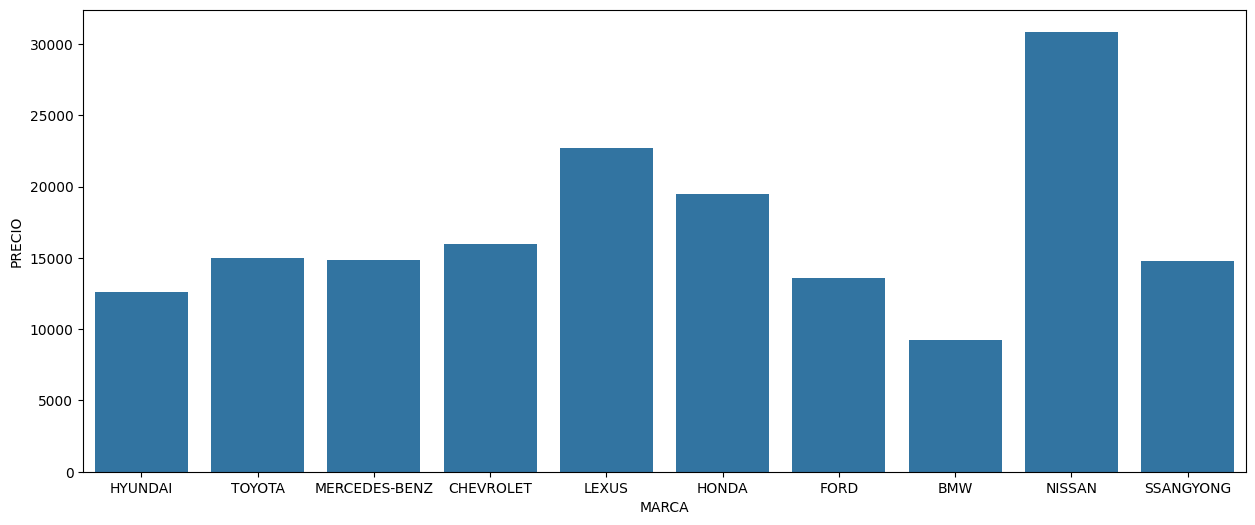

In [ ]:
#En este gráfico podemos observar que segun la marca del vehículo el precio aumenta o disminuye.
plt.figure(figsize=(15,6))
sns.barplot(y=promedio_precio_top10, x=top_10_marcas);

In [ ]:
promedio_precio_categoria= df_car_price.groupby('CATEGORIA')['PRECIO'].mean().round(1)
promedio_precio_categoria

,PRECIO
CATEGORIA,
Cabriolet,25822.6
Coupe,16937.9
Goods wagon,7330.4
Hatchback,12320.7
Jeep,22283.5
Limousine,19130.4
Microbus,14326.5
Minivan,20618.2
Pickup,22753.2


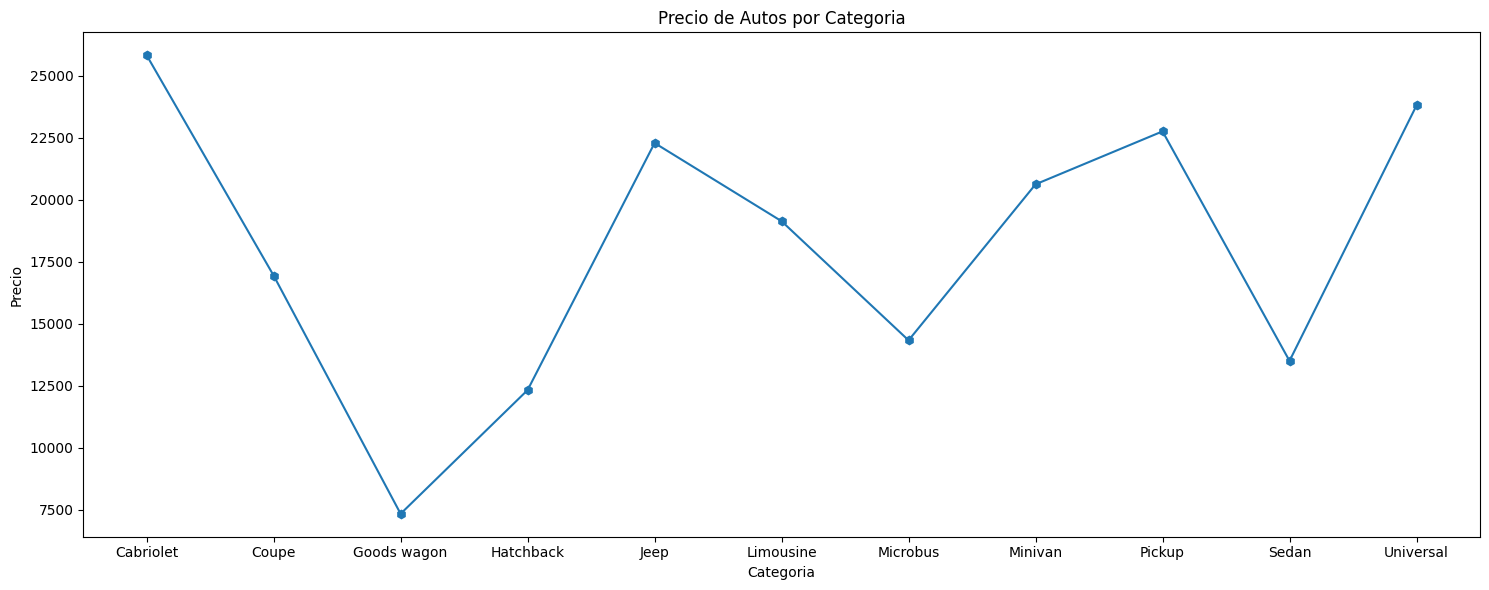

In [ ]:
#Al igual que sucede con las marcas, la categoría tambien influye en gran medida en el precio de un vehículo.
promedio_precio_categoria = df_car_price.groupby('CATEGORIA')['PRECIO'].mean().round(1)
categorias = promedio_precio_categoria.index
valores = promedio_precio_categoria.values
plt.figure(figsize=(15, 6))
plt.plot(categorias, valores, linestyle='solid', marker='h')
plt.title('Precio de Autos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()


In [ ]:
#Buscamos cuantos automoviles tienen volumen motor mayor a 5.5
nun_missing = (df_car_price[['VOLUMEN_MOTOR']] > 5.5).sum()
print(nun_missing)

VOLUMEN_MOTOR    0
dtype: int64


In [ ]:
# reemplazar los valores mayores que 5.5 por np.nan, ya que los motores con mayor volumen no son muy comunes.
df_car_price['VOLUMEN_MOTOR'] = df_car_price['VOLUMEN_MOTOR'].where(df_car_price['VOLUMEN_MOTOR'] < 5.5, pd.NA)
df_car_price.dropna(subset=['VOLUMEN_MOTOR'], inplace=True)
df_car_price.shape

(16244, 17)

In [ ]:
df_car_price.VOLUMEN_MOTOR.isnull().sum()

0

In [ ]:
# remover filas con na
df_car_price.dropna(inplace=True)
# mirar el resultado final
df_car_price.shape

(16244, 17)

In [ ]:
#El valor de correlación que existe entre el volumen del motor y el precio del vehiculo nos dice que no hay una fuerte relación entre estas dos variables.
#Podemos decir que el volumen del motor no influye a la hora de tasar un vehículo.
print(f"El valor de correlación es {np.corrcoef(df_car_price.VOLUMEN_MOTOR, df_car_price.PRECIO)[0,1]} \n")
np.corrcoef(df_car_price.VOLUMEN_MOTOR, df_car_price.PRECIO)

El valor de correlación es 0.08571159503326052 



array([[1.       , 0.0857116],
       [0.0857116, 1.       ]])

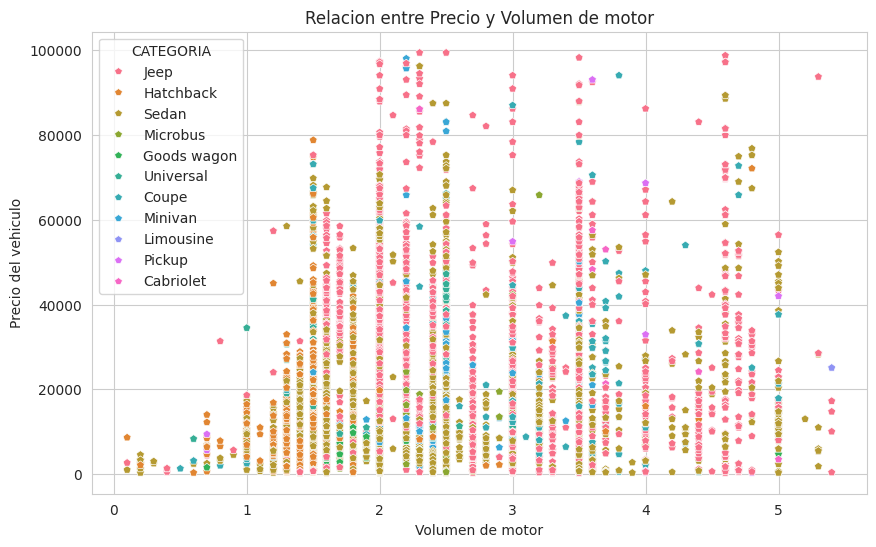

In [ ]:
#diagrama de dispersion
sns.set_style('whitegrid') #estilo
plt.figure(figsize=(10,6)) #tamaño
sns.scatterplot(x=df_car_price.VOLUMEN_MOTOR, y= df_car_price.PRECIO, hue=df_car_price.CATEGORIA, marker="p") #esta linea es obligatoria
plt.title('Relacion entre Precio y Volumen de motor')
plt.xlabel('Volumen de motor')
plt.ylabel('Precio del vehiculo')
plt.show()

In [ ]:
#Buscamos cuantos valores únicos existen en la columna CUERO_INTERIOR
df_car_price.CUERO_INTERIOR.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#Buscamos cuantos valores únicos existen en la columna TRACCION
df_car_price.TRACCION.unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [ ]:
#Cantidad por variable
df_car_price.TRACCION.value_counts()

,count
TRACCION,
Front,11517
4x4,3142
Rear,1585


Text(0, 0.5, 'PRECIO')

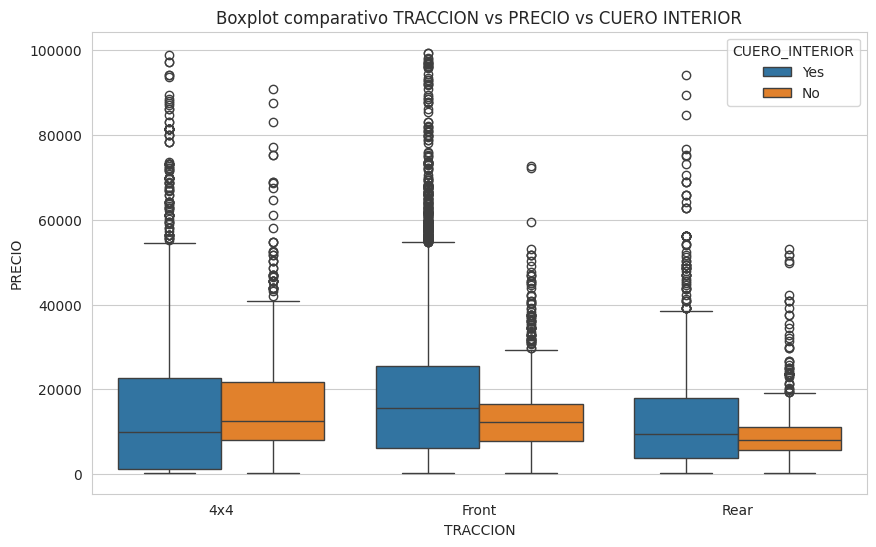

In [ ]:
#En este diagrama podemos observar que el no contar con cuero en el interior de un vehículo si influye en el precio,
# ya que el precio disminuye cuando el vehículo no lo tiene.
#La tracción del vehículo es una caracteristica que tambien influye en el precio, ya sea para un precio mas alto o mas bajo.
#Si sumamos estas dos variables (Tipo de tracción, y existencia de cuero en el interior) podemos observar que el precio varía mucho mas.
plt.figure(figsize=(10,6))
sns.boxplot(x=df_car_price.TRACCION, y= df_car_price.PRECIO, hue= df_car_price.CUERO_INTERIOR)
plt.title('Boxplot comparativo TRACCION vs PRECIO vs CUERO INTERIOR')
plt.xlabel('TRACCION')
plt.ylabel('PRECIO')